In [50]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
sns.set_theme()

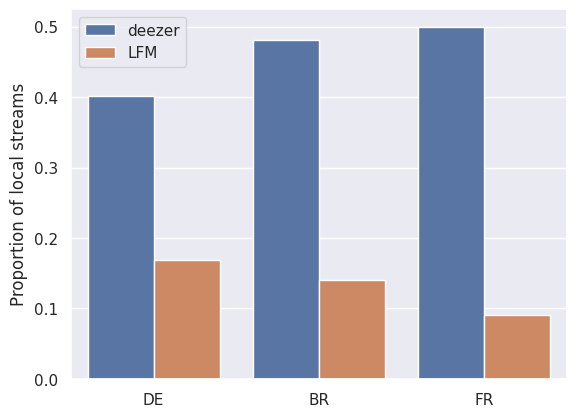

In [55]:
proportion_local = []

for dataset in ['DEEZER', 'LFM']:
    for country in ['DE', 'BR', 'FR']:
        f = dataset + '_' + country
        # original data
        df = pd.read_csv('data/' + f + '/' + f + '.inter')
        df = df.rename(columns={'user_id:token': 'user_id' , 'item_id:token': 'media_id'})
        metadata = pd.read_csv('data/metadata_' + dataset + '.csv')[['media_id', 'country']]
        df = pd.merge(df, metadata, on=['media_id'], how='left')
        proportion_local.append([dataset,
                                 country,
                                 df['country'].value_counts(normalize=True)[country]])
        
proportion_local = pd.DataFrame(proportion_local, columns=['Dataset', 'Country', 'Proportion of local streams'])
sns.barplot(proportion_local, x='Country', y='Proportion of local streams', hue='Dataset')
plt.legend(title='')
plt.xlabel('')
plt.savefig('figures/1.pdf')

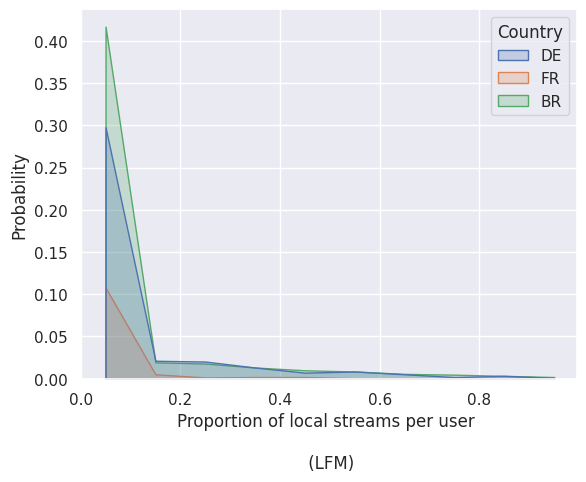

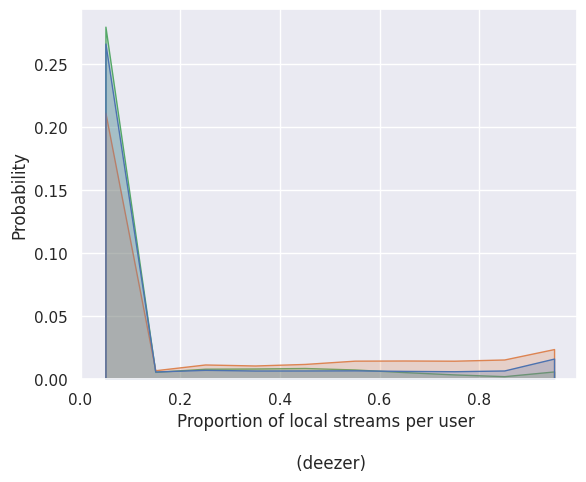

In [56]:
# Dataset - Figure 2.1: Distribution of local streams proportion for each user
# LFM dataset

for dataset in ['LFM', 'DEEZER']:
    
    res = []
    
    for country in ['DE', 'FR', 'BR']:
        
        # original data
        f = dataset + '_' + country
        df = pd.read_csv('data/' + f + '/' + f + '.inter')
        df = df.rename(columns={'user_id:token': 'user_id' , 'item_id:token': 'media_id'})
        metadata = pd.read_csv('data/metadata_' + dataset + '.csv')
        df = pd.merge(df, metadata, on=['media_id'], how='left')[['user_id', 'media_id', 'country']]
        df['user_nb_streams'] = df.groupby(['user_id'])['user_id'].transform('count')
        df['user_nb_streams_local'] = df[df['country'] == country].groupby(['user_id'])['user_id'].transform('count')
        df['user_nb_streams_local'] = df['user_nb_streams_local'].fillna(0)
        df = df.groupby(['user_id']).first()
        df['ratio_local'] = df['user_nb_streams_local'] / df['user_nb_streams']
        df = df.sort_values(by=['ratio_local'], ascending=False).reset_index()
        for r in df['ratio_local'].to_list():
            res.append([country, r])

    res = pd.DataFrame(res, columns=['Country', 'Proportion of local streams per user'])
    sns.histplot(data=res, x='Proportion of local streams per user', hue='Country', bins=10, stat='probability', element="poly")
    if dataset == 'deezer':
        plt.legend('',frameon=False)
    plt.xlabel('Proportion of local streams per user \n\n (' + dataset + ')')
    plt.xticks(np.arange(0, 1, step=0.2))
    plt.show()
    plt.savefig('figures/2-' + dataset + '.pdf')
    plt.close()
    

<AxesSubplot: xlabel='Country', ylabel='% local streams'>

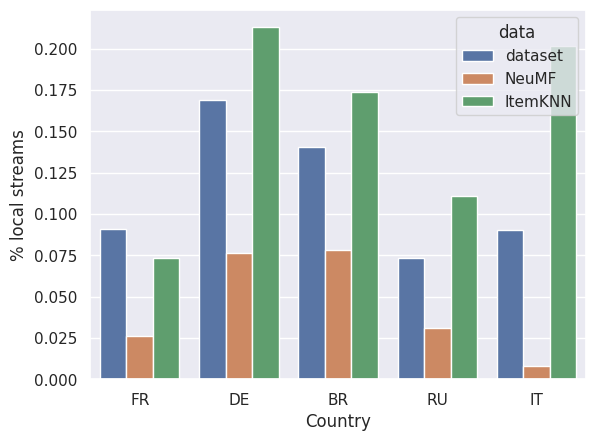

In [110]:
proportion_local = []

for country in ['FR', 'DE', 'BR', 'RU', 'IT']:
    
    users = pd.read_csv('data/LFM_GLOBAL/demo.txt', delimiter='\t', names=['user_country', 'age', 'sex', 'date'])
    users = users.index[users['user_country'] == country].unique().to_list()
    
    # original data
    df = pd.read_csv('data/LFM_GLOBAL/LFM_GLOBAL.inter')
    df = df.rename(columns={'user_id:token': 'user_id', 'item_id:token': 'media_id'})
    df = df[df['user_id'].isin(users)]
    metadata = pd.read_csv('data/LFM_GLOBAL/tracks.txt', delimiter='\t', names=['artist', 'title', 'country'])
    metadata['media_id'] = metadata.index
    df = pd.merge(df, metadata, on=['media_id'], how='left')
    proportion_local.append([country,
                             df['country'].value_counts(normalize=True)[country],
                             'dataset'])

    # recommendation results
    for model in ['NeuMF', 'ItemKNN']:
        df2 = pd.read_csv('predicted/LFM/GLOBAL/' + model + '.csv')
        df2 = df2[df2['user_id'].isin(users)]
        df2 = pd.merge(df2, metadata, on=['media_id'], how='left')
        
        proportion_local.append([country,
                             df2['country'].value_counts(normalize=True)[country],
                             model])

proportion_local = pd.DataFrame(proportion_local, columns=['Country', '% local streams', 'data'])
sns.barplot(proportion_local, x='Country', y='% local streams', hue='data')
#plt.savefig('../../figures/3-1.pdf')

<AxesSubplot: xlabel='Country', ylabel='% local streams'>

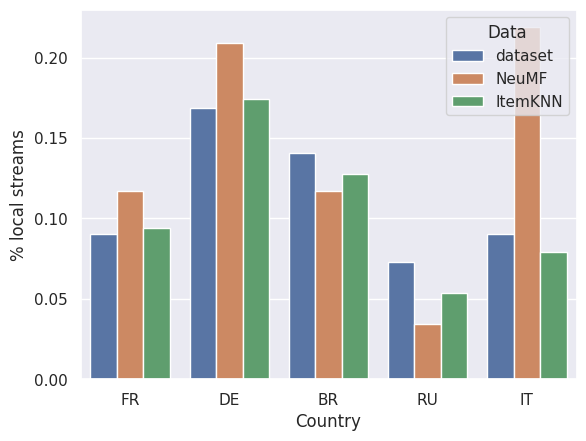

In [119]:
proportion_local = []

dataset = 'LFM'

for country in ['FR', 'DE', 'BR', 'RU', 'IT']:
    # original data
    f = dataset + '_' + country
    df = pd.read_csv('data/' + f + '/' + f + '.inter')
    df = df.rename(columns={'user_id:token': 'user_id' , 'item_id:token': 'media_id'})
    metadata = pd.read_csv('data/metadata_' + dataset + '.csv')[['media_id', 'country']]
    df = pd.merge(df, metadata, on=['media_id'], how='left')
    proportion_local.append(['dataset',
                             country,
                             df['country'].value_counts(normalize=True)[country]])
    # recommendation results
    for model in ['NeuMF', 'ItemKNN']:
        df2 = pd.read_csv('predicted/' + dataset + '/' + country + '/' + model + '.csv')
        df2 = pd.merge(df2, metadata, on=['media_id'], how='left')
        proportion_local.append([model,
                                 country,
                                 df2['country'].value_counts(normalize=True)[country]])
        
proportion_local = pd.DataFrame(proportion_local, columns=['Data', 'Country', '% local streams'])
sns.barplot(proportion_local, x='Country', y='% local streams', hue='Data')

<AxesSubplot: xlabel='Country', ylabel='% local streams'>

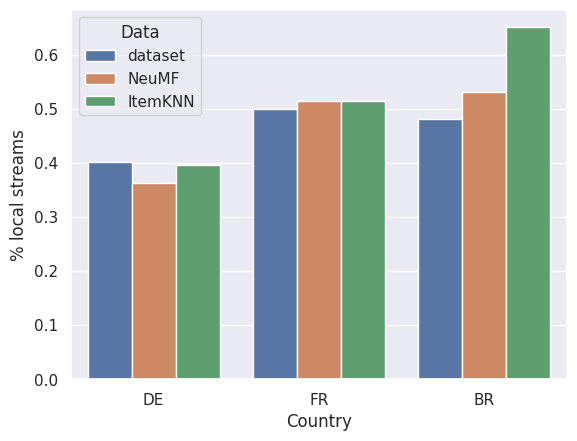

In [122]:
proportion_local = []

dataset = 'DEEZER'

for country in ['DE', 'FR', 'BR']:
    # original data
    f = dataset + '_' + country
    df = pd.read_csv('data/' + f + '/' + f + '.inter')
    df = df.rename(columns={'user_id:token': 'user_id' , 'item_id:token': 'media_id'})
    metadata = pd.read_csv('data/metadata_' + dataset + '.csv')[['media_id', 'country']]
    df = pd.merge(df, metadata, on=['media_id'], how='left')
    proportion_local.append(['dataset',
                             country,
                             df['country'].value_counts(normalize=True)[country]])
    # recommendation results
    for model in ['NeuMF', 'ItemKNN']:
        df2 = pd.read_csv('predicted/' + dataset + '/' + country + '/' + model + '.csv')
        df2 = pd.merge(df2, metadata, on=['media_id'], how='left')
        proportion_local.append([model,
                                 country,
                                 df2['country'].value_counts(normalize=True)[country]])
        
proportion_local = pd.DataFrame(proportion_local, columns=['Data', 'Country', '% local streams'])
sns.barplot(proportion_local, x='Country', y='% local streams', hue='Data')